In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score


In [3]:
train =  pd.read_csv('../train.csv')
test =  pd.read_csv('../test.csv')

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

train.drop(columns=['Unnamed: 0','id'],inplace = True)
test.drop(columns=['Unnamed: 0','id'],inplace = True)
X = train.drop('satisfaction', axis=1)

Train data shape: (103904, 25)
Test data shape: (25976, 25)


In [4]:

df = pd.DataFrame(X)

# Apply LabelEncoder to each column
X = LabelEncoder()
X = df.apply(X.fit_transform)

# Print the transformed DataFrame
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,6,1,2,358,3,4,3,1,...,5,5,4,3,3,4,5,5,25,18
1,1,1,18,0,0,144,3,2,3,3,...,1,1,1,5,2,1,4,1,1,6
2,0,0,19,0,0,994,2,2,2,2,...,5,5,4,3,3,4,4,5,0,0
3,0,0,18,0,0,446,2,5,5,5,...,2,2,2,5,2,1,4,2,11,9
4,1,0,54,0,0,124,3,3,3,3,...,5,3,3,4,3,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,16,0,1,102,2,1,2,3,...,2,2,3,1,3,2,3,2,3,0
103900,1,0,42,0,0,2143,4,4,4,4,...,5,5,5,5,4,5,5,4,0,0
103901,1,1,23,0,0,1791,1,1,1,3,...,5,4,3,2,3,5,5,4,7,14
103902,0,1,15,0,1,860,1,1,1,5,...,1,1,4,5,0,5,4,1,0,0


In [5]:
# X= X.dropna()

In [6]:
y_test = test['satisfaction']
test = test.drop('satisfaction', axis=1)
df = pd.DataFrame(test)

# Apply LabelEncoder to each column
enc = LabelEncoder()
test = df.apply(enc.fit_transform)

# Print the transformed DataFrame
test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,45,0,1,70,5,4,3,3,...,2,5,5,5,4,1,5,5,50,44
1,0,0,29,0,0,2300,1,1,3,0,...,4,4,4,4,3,2,4,5,0,0
2,1,1,13,0,1,95,2,0,2,3,...,1,2,4,1,2,1,2,2,0,0
3,1,0,37,0,0,2740,0,0,0,1,...,3,1,1,1,0,2,1,4,0,6
4,0,0,42,0,1,926,2,3,4,2,...,1,2,2,2,1,3,2,4,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,27,0,0,389,3,3,3,0,...,3,4,3,2,3,3,5,4,0,0
25972,1,0,16,0,0,495,4,4,4,3,...,3,4,4,5,4,4,5,4,0,0
25973,0,0,10,1,1,641,2,5,1,4,...,1,2,4,3,3,4,4,2,0,0
25974,1,0,7,0,0,886,3,3,3,2,...,3,4,3,2,4,3,5,4,0,0


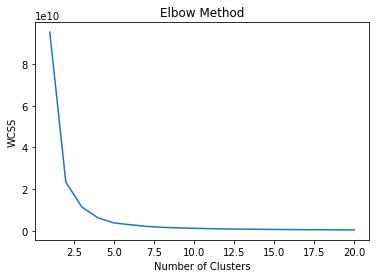

In [16]:
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
# plt.figure(figsize=(24,7))
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# # Elbow method
# wcss = []
# for i in range(1, 21):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
# plt.figure(figsize=(24,7))
# plt.plot(range(1, 21), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()
# # Shows 2 clusters to be formed:

In [8]:

# Create a K-Means object
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters (k)

# Train the K-Means model
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Print the cluster labels and centers
print("Cluster Labels:", labels)
print("Cluster Centers:", centers)

Cluster Labels: [0 0 0 ... 1 0 1]
Cluster Centers: [[4.89756674e-01 2.45370440e-01 3.12918402e+01 3.95409052e-01
  7.81778538e-01 4.39214754e+02 2.72163590e+00 3.08099269e+00
  2.69341187e+00 2.97510713e+00 3.14909983e+00 3.05269294e+00
  3.29288494e+00 3.23978317e+00 3.28054449e+00 3.22856321e+00
  2.58421029e+00 3.23667913e+00 3.58987326e+00 3.20035431e+00
  1.48393168e+01 1.66553155e+01]
 [4.96843250e-01 1.08123929e-01 3.32593135e+01 2.30965422e-01
  3.83660158e-01 1.59318468e+03 2.74867249e+00 3.07158088e+00
  2.84542376e+00 2.96868336e+00 3.25412886e+00 3.46155454e+00
  3.60889744e+00 3.47819543e+00 3.50988836e+00 3.48998620e+00
  2.68449220e+00 3.40414768e+00 3.72212234e+00 3.38683781e+00
  1.44360915e+01 1.56640465e+01]
 [4.98350545e-01 1.36259323e-02 3.60185743e+01 4.38181297e-02
  6.64084911e-02 2.97966416e+03 2.73522662e+00 2.94291452e+00
  2.90576592e+00 2.99935456e+00 3.36409925e+00 3.82444062e+00
  3.84258462e+00 3.71292312e+00 3.64586919e+00 3.69291452e+00
  2.76706827e+0

In [21]:
print(len(centers[0]))


22


In [9]:

test['KMeans']=kmeans.predict(test)
predictions = test['KMeans']


In [25]:
print(centers[:, 5])

[ 439.21475402 1593.18468035 2979.66415663]


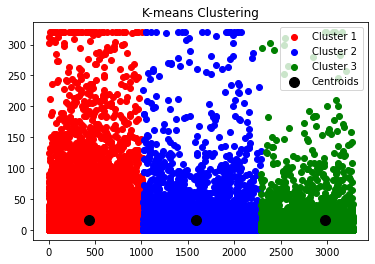

In [27]:
# colors = ['red','blue','yellow','green']
plt.scatter(data=test[test['KMeans']==0], x='Flight Distance', y='Arrival Delay in Minutes',color='red', label='Cluster 1')
plt.scatter(data=test[test['KMeans']==1], x='Flight Distance', y='Arrival Delay in Minutes',color='blue', label='Cluster 2')
plt.scatter(data=test[test['KMeans']==2], x='Flight Distance', y='Arrival Delay in Minutes',color='green', label='Cluster 3')
plt.scatter(centers[:, df.columns.get_loc('Flight Distance')], centers[:,df.columns.get_loc('Arrival Delay in Minutes') ], s = 100, c = 'black', label = 'Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

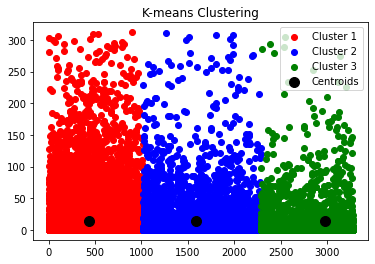

In [29]:
plt.scatter(data=test[test['KMeans']==0], x='Flight Distance', y='Departure Delay in Minutes',color='red', label='Cluster 1')
plt.scatter(data=test[test['KMeans']==1], x='Flight Distance', y='Departure Delay in Minutes',color='blue', label='Cluster 2')
plt.scatter(data=test[test['KMeans']==2], x='Flight Distance', y='Departure Delay in Minutes',color='green', label='Cluster 3')
plt.scatter(centers[:, df.columns.get_loc('Flight Distance')], centers[:,df.columns.get_loc('Departure Delay in Minutes') ], s = 100, c = 'black', label = 'Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

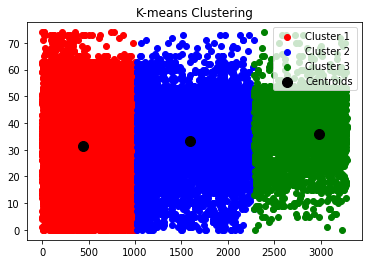

In [32]:
plt.scatter(data=test[test['KMeans']==0], x='Flight Distance', y='Age',color='red', label='Cluster 1')
plt.scatter(data=test[test['KMeans']==1], x='Flight Distance', y='Age',color='blue', label='Cluster 2')
plt.scatter(data=test[test['KMeans']==2], x='Flight Distance', y='Age',color='green', label='Cluster 3')
plt.scatter(centers[:, df.columns.get_loc('Flight Distance')], centers[:,df.columns.get_loc('Age') ], s = 100, c = 'black', label = 'Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

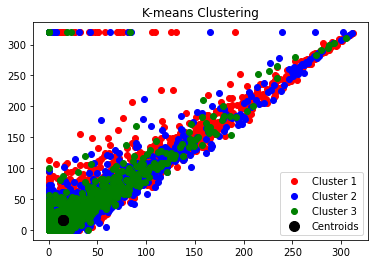

In [30]:

plt.scatter(data=test[test['KMeans']==0], x='Departure Delay in Minutes', y='Arrival Delay in Minutes',color='red', label='Cluster 1')
plt.scatter(data=test[test['KMeans']==1], x='Departure Delay in Minutes', y='Arrival Delay in Minutes',color='blue', label='Cluster 2')
plt.scatter(data=test[test['KMeans']==2], x='Departure Delay in Minutes', y='Arrival Delay in Minutes',color='green', label='Cluster 3')
plt.scatter(centers[:, df.columns.get_loc('Departure Delay in Minutes')], centers[:,df.columns.get_loc('Arrival Delay in Minutes') ], s = 100, c = 'black', label = 'Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

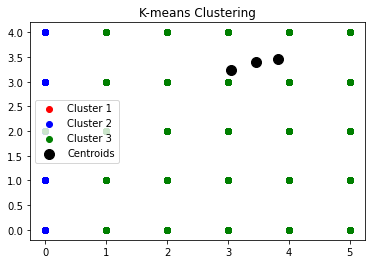

In [28]:
plt.scatter(data=test[test['KMeans']==0], x='Online boarding', y='Checkin service',color='red', label='Cluster 1')
plt.scatter(data=test[test['KMeans']==1], x='Online boarding', y='Checkin service',color='blue', label='Cluster 2')
plt.scatter(data=test[test['KMeans']==2], x='Online boarding', y='Checkin service',color='green', label='Cluster 3')
plt.scatter(centers[:, df.columns.get_loc('Online boarding')], centers[:,df.columns.get_loc('Checkin service') ], s = 100, c = 'black', label = 'Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [11]:
# predictions = kmeans.predict(test)



# print("New data point predictions:")
# for i, prediction in enumerate(predictions):
#     print(f"Data point {i}: Cluster {prediction}")

# Create a colormap for the scatter plot
colors = ['red', 'blue']

# # Plot the clusters
# plt.scatter(test["Flight Distance"], test["Departure Delay in Minutes"], c=[colors[prediction] for prediction in predictions])
# plt.xlabel('Flight Distance')
# plt.ylabel('Departure Delay in Minutes')
# plt.title('K-means Clustering')
# plt.show()


# # Plot the clusters
# plt.scatter(test["Flight Distance"], test["Arrival Delay in Minutes"], c=[colors[prediction] for prediction in predictions])
# plt.xlabel('Flight Distance')
# plt.ylabel('Arrival Delay in Minutes')
# plt.title('K-means Clustering')
# plt.show()

print(predictions)

0        0
1        2
2        0
3        2
4        0
        ..
25971    0
25972    0
25973    0
25974    0
25975    0
Name: KMeans, Length: 25976, dtype: int32


In [12]:

silhouette_avg = silhouette_score(test, predictions)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.623666721917776


In [13]:
# predictions = pd.DataFrame(predictions)
# enc = LabelEncoder()
# y_test =pd.DataFrame( y_test)
# # y_test = y_test.replace({'satisfied': 0, 'neutral or dissatisfied': 1})
# y_test = y_test.apply(enc.fit_transform)
# # print(y_test)
# # y_test
# # assert y_test.shape == predictions.shape, "DataFrames should have the same shape"
# y_test = y_test.values
# predictions = predictions.values
# predictions = np.where(predictions == 1, 0, 1)

# # Calculate accuracy by comparing the labels or values
# accuracy = (y_test == predictions).mean()

# print("Accuracy:", accuracy)

Accuracy: 0.3896288882044965
